In [1]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn import metrics
from config import config
import os
from tqdm import tqdm

conf = config()

# 股价数据读取

In [ ]:
base_path = conf.base_path
stock_path = os.path.join(base_path, 'OldData')
company_info = pd.read_csv(os.path.join(base_path, 'company_info.csv'), encoding='gbk') # encoding='utf-8'
company_info.drop(['index', 'symbol', 'fullname'], axis=1, inplace=True)

df_list = []
for ts_code in tqdm(company_info['ts_code']):
    path = os.path.join(stock_path, ts_code+'_NormalData.csv')
    df = pd.read_csv(path)
    df = df[['trade_date', 'ts_code', 'close', 'high', 'low']]
    df = df.sort_values('trade_date', ascending=True).reset_index(drop=True)
    df['next_close'] = df['close'].shift(-1)
    df_list.append(df)
    

 37%|████████████████████████████▉                                                 | 1077/2906 [00:21<00:41, 44.44it/s]

In [60]:
df = pd.concat(df_list)
del df_list
df = df[df['trade_date']>=conf.test_date_start]
df.dropna(inplace=True)

In [75]:
day_list = sorted(df['trade_date'].unique())

In [155]:
pred = pd.read_csv('pred.csv')

In [164]:
pred['pred_label'] = pred['pred'] > 0.9
# pred['true'] = (pred['pred_label'] == 1) & (pred['label'] == 1)

In [165]:
buy_df = pred[pred['pred_label'] == 1]

In [166]:
buy_df = buy_df.merge(df, on=['ts_code', 'trade_date'], how='inner')

In [167]:
buy_df['is_limit_up'] = (buy_df['close'] == buy_df['high']) #(buy_df['close_price'] == buy_df['high']) | 
buy_df = buy_df[(buy_df['is_limit_up']==False)].reset_index(drop=True)
buy_df['day'] = buy_df['trade_date']
buy_df = buy_df.rename(columns={'pred':'prob', 'ts_code':'name'})
buy_df['close_price'] = buy_df['close']

In [169]:
from imp import reload
import Account
reload(Account)
money_init = 100000
account = Account.Account(money_init)
account.BackTest(buy_df, sorted(day_list), buy_price='close')

20190116  买入 000782.SZ (000782.SZ) 5600股，股价：4.4151,花费：24724.56,手续费：7.42，剩余现金：75268.02
20190116  买入 002041.SZ (002041.SZ) 4400股，股价：5.61,花费：24684.0,手续费：7.41，剩余现金：50576.62
20190116  买入 002800.SZ (002800.SZ) 1400股，股价：17.183,花费：24056.2,手续费：7.22，剩余现金：26513.2
20190116  买入 000882.SZ (000882.SZ) 10500股，股价：2.37,花费：24885.0,手续费：7.47，剩余现金：1620.74
20190117  止损卖出 (000782.SZ) 5600股，股价：4.3057,收入：24111.92,手续费：31.35，剩余现金：25701.31，最终亏损：-651.4
20190117  止损卖出 (002041.SZ) 4400股，股价：5.49,收入：24156.0,手续费：31.4，剩余现金：49825.91，最终亏损：-566.81
20190117  止损卖出 (002800.SZ) 1400股，股价：17.0331,收入：23846.34,手续费：31.0，剩余现金：73641.25，最终亏损：-248.08
20190117  止损卖出 (000882.SZ) 10500股，股价：2.36,收入：24780.0,手续费：32.21，剩余现金：98389.03，最终亏损：-144.68
20190125  买入 600687.SH (600687.SH) 5300股，股价：4.59,花费：24327.0,手续费：7.3，剩余现金：74054.73
20190125  买入 002501.SZ (002501.SZ) 8500股，股价：2.87,花费：24395.0,手续费：7.32，剩余现金：49652.42
20190125  买入 600101.SH (600101.SH) 4600股，股价：5.2832,花费：24302.72,手续费：7.29，剩余现金：25342.41
20190125  买入 603566.SH (603566.SH) 2000股，股价：11.8273,

20191203  买入 002832.SZ (002832.SZ) 900股，股价：23.61,花费：21249.0,手续费：6.37，剩余现金：65543.94
20191203  买入 002392.SZ (002392.SZ) 6000股，股价：3.56,花费：21360.0,手续费：6.41，剩余现金：44177.54
20191203  买入 002758.SZ (002758.SZ) 2100股，股价：10.23,花费：21483.0,手续费：6.44，剩余现金：22688.09
20191203  买入 603658.SH (603658.SH) 200股，股价：98.3,花费：19660.0,手续费：5.9，剩余现金：3022.19
20191204  止盈卖出 (002832.SZ) 900股，股价：23.72,收入：21348.0,手续费：27.75，剩余现金：24342.44，最终盈利：64.87
20191204  止盈卖出 (002392.SZ) 6000股，股价：3.57,收入：21420.0,手续费：27.85，剩余现金：45734.59，最终盈利：25.75
20191204  止损卖出 (002758.SZ) 2100股，股价：10.14,收入：21294.0,手续费：27.68，剩余现金：67000.91，最终亏损：-223.13
20191204  止盈卖出 (603658.SH) 200股，股价：100.79,收入：20158.0,手续费：26.21，剩余现金：87132.71，最终盈利：465.9
20200121  买入 000607.SZ (000607.SZ) 4300股，股价：5.05,花费：21715.0,手续费：6.51，剩余现金：65411.19
20200121  买入 601579.SH (601579.SH) 2500股，股价：8.55,花费：21375.0,手续费：6.41，剩余现金：44029.78
20200121  买入 603602.SH (603602.SH) 900股，股价：22.88,花费：20592.0,手续费：6.18，剩余现金：23431.6
20200121  买入 000606.SZ (000606.SZ) 4000股，股价：5.37,花费：21480.0,手续费：6.44，剩

In [176]:
buy_df[buy_df['label']!=buy_df['label2']]

,label,prob,name,trade_date,pred_label,close,high,low,next_close,is_limit_up,day,close_price,label2


In [170]:
account_profit = (account.market_value - money_init) / money_init
win_rate = account.victory / (account.victory + account.defeat)
print('账户盈利情况:%.4f' % account_profit)
print('交易胜率:%.4f' % win_rate)
print('最大回撤率:%.4f' % account.max_retracement)

账户盈利情况:-0.2080
交易胜率:0.4857
最大回撤率:0.2192


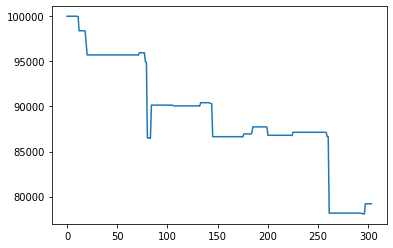

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(account.market_value_all)
plt.show()